In [11]:
import pandas as pd 
import numpy as np 
from glob import glob

# Sector group
gics_map = pd.read_csv("GICS_code.csv", dtype=str).set_index("Stock Code")["GICS Code"].to_dict()
gics_map = { k.zfill(6): v for k, v in gics_map.items()}

# Price
df = pd.read_csv("close.csv", index_col="Date", parse_dates=True, dtype=float)
assert(df.isna().any().any()==False)
df.columns = pd.MultiIndex.from_arrays([df.columns.map(gics_map), df.columns], names=["sector", "code"])
df = df.sort_index(axis=1)
df = df.T.drop_duplicates().T
df = df.apply(np.log).diff().dropna()

In [ ]:
start_year = "2016"
ret_lb1_uniform = (df).mean(axis=1).loc[start_year:]

In [125]:
path = "weights_4y_nocu"
start_year = "2019"
for gross_exposure in ["1", "1.5", "2.0", "2.5", "3.0"]:
    dates = df.loc[start_year:].index
    weights = dict()
    for date in dates:
        try:
            fname = f"{path}/{gross_exposure}_{date.strftime("%Y%m%d")}_weight.npy"
            w = np.load(fname).T.tolist()[0]
            weights[date] = w
        except:
            pass
            # print(date)
    weights = pd.DataFrame(weights, index = df.columns, columns = df.index).T.astype(float).copy()
    weights = weights.ffill().copy().loc[start_year:]

    # print(weights.shape)
    ret_lb1_threshold = (weights * df).sum(axis=1).loc[start_year:]
    # print(ret_lb1_threshold.shape)
    ret = ret_lb1_threshold.mean()*252
    std = ret_lb1_threshold.std()*np.sqrt(252)
    shp = ret / std
    mdd = (ret_lb1_threshold.cumsum() - (ret_lb1_threshold.cumsum().cummax()) ).min()
    print(path, gross_exposure,"\t", shp.round(4), "\t", ret.round(4), "\t",std.round(4),"\t", mdd.round(4))


weights_4y_nocu 1 	 0.1313 	 0.0098 	 0.0744 	 -0.1123
weights_4y_nocu 1.5 	 0.4755 	 0.0347 	 0.0729 	 -0.112
weights_4y_nocu 2.0 	 0.7196 	 0.0557 	 0.0774 	 -0.1294
weights_4y_nocu 2.5 	 0.272 	 0.0211 	 0.0777 	 -0.1366
weights_4y_nocu 3.0 	 0.6586 	 0.0486 	 0.0738 	 -0.1153


In [126]:
path = "weights_1y"
start_year = "2016"
for gross_exposure in ["1", "1.5", "2.0", "2.5", "3.0"]:
    dates = df.loc[start_year:].index
    weights = dict()
    for date in dates:
        try:
            fname = f"{path}/{gross_exposure}_{date.strftime("%Y%m%d")}_weight.npy"
            w = np.load(fname).T.tolist()[0]
            weights[date] = w
        except:
            pass
            # print(date)
    weights = pd.DataFrame(weights, index = df.columns, columns = df.index).T.astype(float).copy()
    weights = weights.ffill().copy().loc[start_year:]

    # print(weights.shape)
    # ret_lb1_threshold = (weights * df).sum(axis=1)
    ret_lb1_threshold = (weights * df).sum(axis=1).loc[start_year:]

    # print(ret_lb1_threshold.shape)
    ret = ret_lb1_threshold.mean()*252
    std = ret_lb1_threshold.std()*np.sqrt(252)
    shp = ret / std
    mdd = (ret_lb1_threshold.cumsum() - (ret_lb1_threshold.cumsum().cummax()) ).min()
    print(path, gross_exposure,"\t", shp.round(4), "\t", ret.round(4), "\t",std.round(4),"\t", mdd.round(4))


weights_1y 1 	 -0.5738 	 -0.0417 	 0.0727 	 -0.2957
weights_1y 1.5 	 -0.5416 	 -0.0382 	 0.0706 	 -0.2884
weights_1y 2.0 	 -0.4714 	 -0.036 	 0.0764 	 -0.2973
weights_1y 2.5 	 -0.5375 	 -0.0416 	 0.0774 	 -0.3346
weights_1y 3.0 	 -0.2874 	 -0.0224 	 0.0778 	 -0.2784


In [71]:
ret_lb1_sample = (weights * df)


In [127]:
path = "weights_th_4y"
start_year = "2019"
for gross_exposure in ["1", "1.5", "2.0", "2.5", "3.0"]:
    dates = df.loc[start_year:].index
    weights = dict()
    for date in dates:
        try:
            fname = f"{path}/{gross_exposure}_{date.strftime("%Y%m%d")}_weight.npy"
            w = np.load(fname).T.tolist()[0]
            weights[date] = w
        except:
            pass
            # print(date)
    weights = pd.DataFrame(weights, index = df.columns, columns = df.index).T.astype(float).copy()
    weights = weights.ffill().copy().loc[start_year:]

    # print(weights.shape)
    # ret_lb1_threshold = (weights * df).sum(axis=1)
    ret_lb1_threshold = (weights * df).sum(axis=1).loc[start_year:]
    # print(ret_lb1_threshold.shape)
    ret = ret_lb1_threshold.mean()*252
    std = ret_lb1_threshold.std()*np.sqrt(252)
    shp = ret / std
    mdd = (ret_lb1_threshold.cumsum() - (ret_lb1_threshold.cumsum().cummax()) ).min()
    print(path, gross_exposure,"\t", shp.round(4), "\t", ret.round(4), "\t",std.round(4),"\t", mdd.round(4))



weights_th_4y 1 	 -0.5956 	 -0.0536 	 0.09 	 -0.1615
weights_th_4y 1.5 	 -0.0257 	 -0.0023 	 0.0888 	 -0.1467
weights_th_4y 2.0 	 0.2557 	 0.0217 	 0.0851 	 -0.1113
weights_th_4y 2.5 	 0.1411 	 0.0119 	 0.0841 	 -0.1434
weights_th_4y 3.0 	 -0.8058 	 -0.0721 	 0.0895 	 -0.1765


In [136]:
path = "weights_th_1y"
start_year = "2016"
for gross_exposure in ["1", "1.5", "2.0", "2.5", "3.0"]:
    dates = df.loc[start_year:].index
    weights = dict()
    for date in dates:
        try:
            fname = f"{path}/{gross_exposure}_{date.strftime("%Y%m%d")}_weight.npy"
            w = np.load(fname).T.tolist()[0]
            weights[date] = w
        except:
            pass
            # print(date)
    weights = pd.DataFrame(weights, index = df.columns, columns = df.index).T.astype(float).copy()
    weights = weights.ffill().copy().loc[start_year:]

    # print(weights.shape)
    ret_lb1_threshold = (weights * df).sum(axis=1).loc[start_year:]
    # print(ret_lb1_threshold.shape)
    ret = ret_lb1_threshold.mean()*252
    std = ret_lb1_threshold.std()*np.sqrt(252)
    shp = ret / std
    mdd = (ret_lb1_threshold.cumsum() - (ret_lb1_threshold.cumsum().cummax()) ).min()
    print(path, gross_exposure,"\t", shp.round(4), "\t", ret.round(4), "\t",std.round(4),"\t", mdd.round(4))


weights_th_1y 1 	 -0.75 	 -0.0734 	 0.0978 	 -0.3913
weights_th_1y 1.5 	 -0.6198 	 -0.059 	 0.0952 	 -0.3368
weights_th_1y 2.0 	 -0.5898 	 -0.0566 	 0.096 	 -0.3338
weights_th_1y 2.5 	 -0.768 	 -0.0733 	 0.0954 	 -0.3829
weights_th_1y 3.0 	 -0.6132 	 -0.0578 	 0.0943 	 -0.2943


In [129]:
path = "weights_poet"
start_year = "2019"
for gross_exposure in ["1", "1.5", "2.0", "2.5", "3.0"]:
    dates = df.loc[start_year:].index
    weights = dict()
    for date in dates:
        try:
            fname = f"{path}/1008_{gross_exposure}_{date.strftime("%Y%m%d")}_weight.npy"
            # print(fname)
            # break
            # w = np.load(fname)
            # print(w.T.tolist()[0])
            # break
            # print(w.shape)
            w = np.load(fname).T.tolist()[0]
            weights[date] = w
            # print(w)
            # break
        except:
            pass
            # print(date)
    weights = pd.DataFrame(weights, index = df.columns, columns = df.index).T.astype(float).copy()
    weights = weights.ffill().copy().loc[start_year:]

    # print(weights.shape)
    ret_lb1_threshold = (weights * df).sum(axis=1).loc[start_year:]
    # print(ret_lb1_threshold.shape)
    ret = ret_lb1_threshold.mean()*252
    std = ret_lb1_threshold.std()*np.sqrt(252)
    shp = ret / std
    mdd = (ret_lb1_threshold.cumsum() - (ret_lb1_threshold.cumsum().cummax()) ).min()
    print(path, gross_exposure,"\t", shp.round(4), "\t", ret.round(4), "\t",std.round(4),"\t", mdd.round(4))



weights_poet 1 	 -0.0719 	 -0.0056 	 0.0786 	 -0.1505
weights_poet 1.5 	 -0.2596 	 -0.02 	 0.0772 	 -0.1626
weights_poet 2.0 	 0.2937 	 0.0232 	 0.0791 	 -0.1449
weights_poet 2.5 	 0.1051 	 0.0081 	 0.0773 	 -0.1384
weights_poet 3.0 	 0.2648 	 0.0207 	 0.0783 	 -0.1581


In [130]:
path = "weights_poet"
start_year = "2016"
for gross_exposure in ["1", "1.5", "2.0", "2.5", "3.0"]:
    dates = df.loc[start_year:].index
    weights = dict()
    for date in dates:
        try:
            fname = f"{path}/252_{gross_exposure}_{date.strftime("%Y%m%d")}_weight.npy"
            # print(fname)
            # break
            # w = np.load(fname)
            # print(w.T.tolist()[0])
            # break
            # print(w.shape)
            w = np.load(fname).T.tolist()[0]
            weights[date] = w
            # print(w)
            # break
        except:
            pass
            # print(date)
    weights = pd.DataFrame(weights, index = df.columns, columns = df.index).T.astype(float).copy()
    weights = weights.ffill().copy().loc[start_year:]

    # print(weights.shape)
    ret_lb1_threshold = (weights * df).sum(axis=1).loc[start_year:]
    # print(ret_lb1_threshold.shape)
    ret = ret_lb1_threshold.mean()*252
    std = ret_lb1_threshold.std()*np.sqrt(252)
    shp = ret / std
    mdd = (ret_lb1_threshold.cumsum() - (ret_lb1_threshold.cumsum().cummax()) ).min()
    print(path, gross_exposure,"\t", shp.round(4), "\t", ret.round(4), "\t",std.round(4),"\t", mdd.round(4))



weights_poet 1 	 -0.4997 	 -0.0388 	 0.0777 	 -0.3025
weights_poet 1.5 	 -0.4217 	 -0.0325 	 0.0771 	 -0.28
weights_poet 2.0 	 -0.5171 	 -0.0391 	 0.0757 	 -0.3014
weights_poet 2.5 	 -0.3776 	 -0.0288 	 0.0764 	 -0.278
weights_poet 3.0 	 -0.5977 	 -0.0453 	 0.0758 	 -0.3052


In [144]:
path = "weights_4y_nocu"
start_year = "2019"
for gross_exposure in [ "2.0"]:
    dates = df.loc[start_year:].index
    weights = dict()
    for date in dates:
        try:
            fname = f"{path}/{gross_exposure}_{date.strftime("%Y%m%d")}_weight.npy"
            w = np.load(fname).T.tolist()[0]
            weights[date] = w
        except:
            pass
            # print(date)
    weights = pd.DataFrame(weights, index = df.columns, columns = df.index).T.astype(float).copy()
    weights = weights.ffill().copy().loc[start_year:]

    # print(weights.shape)
    ret_lb1_threshold = (weights * df).sum(axis=1)
    # print(ret_lb1_threshold.shape)
    ret = ret_lb1_threshold.mean()*252
    std = ret_lb1_threshold.std()*np.sqrt(252)
    shp = ret / std
    mdd = (ret_lb1_threshold.cumsum() - (ret_lb1_threshold.cumsum().cummax()) ).min()
    print(path, gross_exposure,"\t", shp.round(4), "\t", ret.round(4), "\t",std.round(4),"\t", mdd.round(4))
    ret_sample = ret_lb1_threshold

path = "weights_th_4y"
start_year = "2019"
for gross_exposure in ["2.0"]:
    dates = df.loc[start_year:].index
    weights = dict()
    for date in dates:
        try:
            fname = f"{path}/{gross_exposure}_{date.strftime("%Y%m%d")}_weight.npy"
            w = np.load(fname).T.tolist()[0]
            weights[date] = w
        except:
            pass
            # print(date)
    weights = pd.DataFrame(weights, index = df.columns, columns = df.index).T.astype(float).copy()
    weights = weights.ffill().copy().loc[start_year:]

    # print(weights.shape)
    ret_lb1_threshold = (weights * df).sum(axis=1)
    # print(ret_lb1_threshold.shape)
    ret = ret_lb1_threshold.mean()*252
    std = ret_lb1_threshold.std()*np.sqrt(252)
    shp = ret / std
    mdd = (ret_lb1_threshold.cumsum() - (ret_lb1_threshold.cumsum().cummax()) ).min()
    print(path, gross_exposure,"\t", shp.round(4), "\t", ret.round(4), "\t",std.round(4),"\t", mdd.round(4))

    ret_thres = ret_lb1_threshold

path = "weights_poet"
start_year = "2019"
for gross_exposure in ["2.0"]:
    dates = df.loc[start_year:].index
    weights = dict()
    for date in dates:
        try:
            fname = f"{path}/1008_{gross_exposure}_{date.strftime("%Y%m%d")}_weight.npy"
            # print(fname)
            # break
            # w = np.load(fname)
            # print(w.T.tolist()[0])
            # break
            # print(w.shape)
            w = np.load(fname).T.tolist()[0]
            weights[date] = w
            # print(w)
            # break
        except:
            pass
            # print(date)
    weights = pd.DataFrame(weights, index = df.columns, columns = df.index).T.astype(float).copy()
    weights = weights.ffill().copy().loc[start_year:]

    # print(weights.shape)
    ret_lb1_threshold = (weights * df).sum(axis=1)
    # print(ret_lb1_threshold.shape)
    ret = ret_lb1_threshold.mean()*252
    std = ret_lb1_threshold.std()*np.sqrt(252)
    shp = ret / std
    mdd = (ret_lb1_threshold.cumsum() - (ret_lb1_threshold.cumsum().cummax()) ).min()
    print(path, gross_exposure,"\t", shp.round(4), "\t", ret.round(4), "\t",std.round(4),"\t", mdd.round(4))
    ret_poet = ret_lb1_threshold


weights_4y_nocu 2.0 	 0.2276 	 0.0056 	 0.0244 	 -0.1294
weights_th_4y 2.0 	 0.0809 	 0.0022 	 0.0268 	 -0.1113
weights_poet 2.0 	 0.093 	 0.0023 	 0.025 	 -0.1449


<Axes: xlabel='Date'>

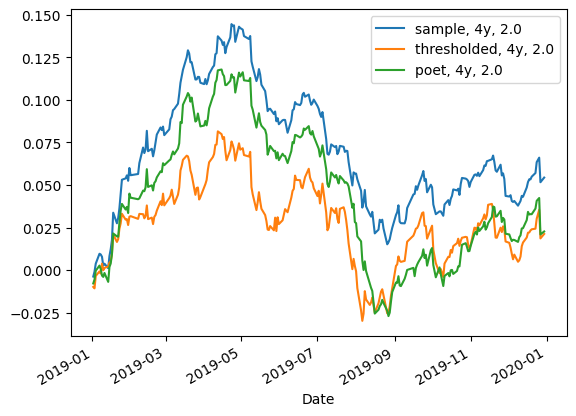

In [146]:
pd.DataFrame({
    "sample, 4y, 2.0":ret_sample,
    "thresholded, 4y, 2.0":ret_thres,
    "poet, 4y, 2.0":ret_poet,
    }).loc["2019":].cumsum().plot()

In [148]:
path = "weights_1y"
start_year = "2016"
for gross_exposure in ["3.0"]:
    dates = df.loc[start_year:].index
    weights = dict()
    for date in dates:
        try:
            fname = f"{path}/{gross_exposure}_{date.strftime("%Y%m%d")}_weight.npy"
            w = np.load(fname).T.tolist()[0]
            weights[date] = w
        except:
            pass
            # print(date)
    weights = pd.DataFrame(weights, index = df.columns, columns = df.index).T.astype(float).copy()
    weights = weights.ffill().copy().loc[start_year:]

    # print(weights.shape)
    # ret_lb1_threshold = (weights * df).sum(axis=1)
    ret_lb1_threshold = (weights * df).sum(axis=1).loc[start_year:]

    # print(ret_lb1_threshold.shape)
    ret = ret_lb1_threshold.mean()*252
    std = ret_lb1_threshold.std()*np.sqrt(252)
    shp = ret / std
    mdd = (ret_lb1_threshold.cumsum() - (ret_lb1_threshold.cumsum().cummax()) ).min()
    print(path, gross_exposure,"\t", shp.round(4), "\t", ret.round(4), "\t",std.round(4),"\t", mdd.round(4))
    ret_sample = ret_lb1_threshold


path = "weights_th_1y"
for gross_exposure in ["2.0"]:
    dates = df.loc[start_year:].index
    weights = dict()
    for date in dates:
        try:
            fname = f"{path}/{gross_exposure}_{date.strftime("%Y%m%d")}_weight.npy"
            w = np.load(fname).T.tolist()[0]
            weights[date] = w
        except:
            pass
            # print(date)
    weights = pd.DataFrame(weights, index = df.columns, columns = df.index).T.astype(float).copy()
    weights = weights.ffill().copy().loc[start_year:]

    # print(weights.shape)
    ret_lb1_threshold = (weights * df).sum(axis=1).loc[start_year:]
    # print(ret_lb1_threshold.shape)
    ret = ret_lb1_threshold.mean()*252
    std = ret_lb1_threshold.std()*np.sqrt(252)
    shp = ret / std
    mdd = (ret_lb1_threshold.cumsum() - (ret_lb1_threshold.cumsum().cummax()) ).min()
    print(path, gross_exposure,"\t", shp.round(4), "\t", ret.round(4), "\t",std.round(4),"\t", mdd.round(4))

    ret_thres = ret_lb1_threshold

path = "weights_poet"
for gross_exposure in ["2.5"]:
    dates = df.loc[start_year:].index
    weights = dict()
    for date in dates:
        try:
            fname = f"{path}/252_{gross_exposure}_{date.strftime("%Y%m%d")}_weight.npy"
            # print(fname)
            # break
            # w = np.load(fname)
            # print(w.T.tolist()[0])
            # break
            # print(w.shape)
            w = np.load(fname).T.tolist()[0]
            weights[date] = w
            # print(w)
            # break
        except:
            pass
            # print(date)
    weights = pd.DataFrame(weights, index = df.columns, columns = df.index).T.astype(float).copy()
    weights = weights.ffill().copy().loc[start_year:]

    # print(weights.shape)
    ret_lb1_threshold = (weights * df).sum(axis=1).loc[start_year:]
    # print(ret_lb1_threshold.shape)
    ret = ret_lb1_threshold.mean()*252
    std = ret_lb1_threshold.std()*np.sqrt(252)
    shp = ret / std
    mdd = (ret_lb1_threshold.cumsum() - (ret_lb1_threshold.cumsum().cummax()) ).min()
    print(path, gross_exposure,"\t", shp.round(4), "\t", ret.round(4), "\t",std.round(4),"\t", mdd.round(4))
    ret_poet = ret_lb1_threshold

weights_1y 3.0 	 -0.2874 	 -0.0224 	 0.0778 	 -0.2784
weights_th_1y 2.0 	 -0.5898 	 -0.0566 	 0.096 	 -0.3338
weights_poet 2.5 	 -0.3776 	 -0.0288 	 0.0764 	 -0.278


<Axes: xlabel='Date'>

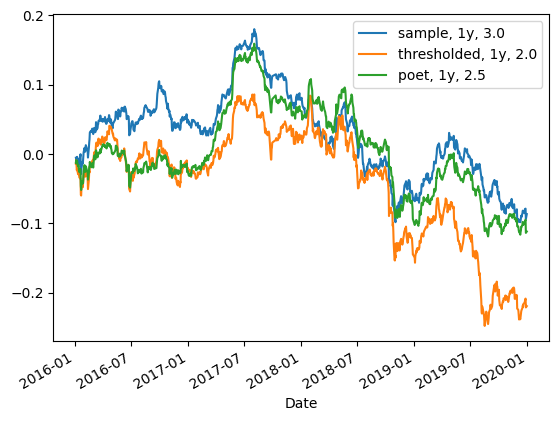

In [149]:
pd.DataFrame({
    "sample, 1y, 3.0":ret_sample,
    "thresholded, 1y, 2.0":ret_thres,
    "poet, 1y, 2.5":ret_poet,
    }).loc["2016":].cumsum().plot()